# Loan Dataset assignment lecture 15

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [62]:
df = pd.read_csv("loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Dealing with gender column

In [64]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [65]:
df["Gender"].isnull().sum()

13

In [66]:
imputer = SimpleImputer(strategy='most_frequent')

df["Gender"] = imputer.fit_transform(df["Gender"].to_frame())
df["Gender"].isnull().sum()

0

In [67]:
# convert Gender column
df["Gender"] = pd.get_dummies(df["Gender"], drop_first=True)
df["Gender"].value_counts()

1    502
0    112
Name: Gender, dtype: int64

## Dealing with Married column

In [68]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [69]:
df["Married"].isnull().sum()

3

In [70]:
df["Married"] = imputer.fit_transform(df["Married"].to_frame())
df["Married"].isnull().sum()

0

In [71]:
df["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [72]:
# convert Married column
df["Married"] = pd.get_dummies(df["Married"], drop_first=True)
df["Married"].value_counts()

1    401
0    213
Name: Married, dtype: int64

## Dealing with Dependents column

In [73]:
df["Dependents"].dtype

dtype('O')

In [74]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [75]:
# convert it into numerical
def to_numeric(X):
    if X != "3+":
        return float(X)
    else:
        return 3

df["Dependents"] = df["Dependents"].apply(to_numeric)

In [76]:
df["Dependents"].isnull().sum()

15

In [77]:
imputer = SimpleImputer(strategy='most_frequent')

df["Dependents"] = imputer.fit_transform(df["Dependents"].to_frame())
df["Dependents"].isnull().sum()

0

## Dealing with Education, Self_Employed columns

In [78]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [79]:
df[["Education", "Self_Employed"]] = pd.get_dummies(df[["Education", "Self_Employed"]], drop_first=True)

## LoanAmount column

In [80]:
df["LoanAmount"].isnull().sum()

22

In [81]:
df["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [82]:
df["LoanAmount"].median()

128.0

In [83]:
imputer = SimpleImputer(strategy="median")
# median == 128.0 categorical
df["LoanAmount"] = imputer.fit_transform(df["LoanAmount"].to_frame())

df["LoanAmount"].isnull().sum()

0

## Loan_Amount_Term column

In [84]:
df["Loan_Amount_Term"].isnull().sum()

14

In [85]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [86]:
imputer = SimpleImputer(strategy="median")
# median == 128.0 categorical
df["Loan_Amount_Term"] = imputer.fit_transform(df["Loan_Amount_Term"].to_frame())

df["Loan_Amount_Term"].isnull().sum()

0

## Credit_History column

In [87]:
df["Credit_History"].isnull().sum()

50

In [88]:
imputer = SimpleImputer(strategy="most_frequent")
# median == 128.0 categorical
df["Credit_History"] = imputer.fit_transform(df["Credit_History"].to_frame())

df["Credit_History"].isnull().sum()

0

## Delete uncessary columns

In [89]:
df.drop(columns=["Property_Area", "Loan_ID"], inplace= True)

## Dealing with unbalanced class

In [90]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

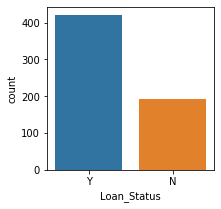

In [91]:
plt.figure(figsize=(3, 3))
sns.countplot(df["Loan_Status"])
plt.show()

In [92]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [93]:
print("Y", (df["Loan_Status"].value_counts()[0] / len(df)*100).round(2),"%")
print("N", (df["Loan_Status"].value_counts()[1] / len(df)*100).round(2),"%")

Y 68.73 %
N 31.27 %


## Feature Scalnig

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
df[["ApplicantIncome","CoapplicantIncome", "LoanAmount",
    "Loan_Amount_Term"]] =  scaler.fit_transform(df[["ApplicantIncome","CoapplicantIncome", 
                                                     "LoanAmount", "Loan_Amount_Term"]])

## Cleaned Dataset and preprared for ML
* Cleaned DataFrame

In [96]:
# cleaned DataFrame
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0.0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,Y
1,1,1,1.0,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,N
2,1,1,0.0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,Y
3,1,1,0.0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,Y
4,1,0,0.0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,Y


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    uint8  
 1   Married            614 non-null    uint8  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    uint8  
 4   Self_Employed      614 non-null    uint8  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Loan_Status        614 non-null    object 
dtypes: float64(6), object(1), uint8(4)
memory usage: 36.1+ KB


* Preperation for ML algorithm

In [98]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [99]:
# over samplig
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [100]:
y.value_counts().to_frame() # its now balanced class

,Loan_Status
Y,422
N,422


In [101]:
# convert target-class
def target(X):
    if X == "Y":
        return 1
    elif X == "N":
        return 0
    
y = y.apply(target)
y.value_counts().to_frame() 

,Loan_Status
1,422
0,422


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
print("training size", X_train.shape)
print("testing size",X_test.shape)

training size (675, 10)
testing size (169, 10)


In [112]:
y_train.to_frame().head()

,Loan_Status
468,1
786,0
538,0
266,1
352,1


In [113]:
# preperation for ML
# X_train, X_test, y_train, y_test 